

## Topics in Smart Health Informatics

### Assignment 2 

Name : Komal Barge (1095709)

Artificial Neural Network and Convolutional Neural Network analysis in detailed for doctor and patient assignment at the hospital.


In [1]:
#Import essential libraries
import pandas as pd
import numpy as np

In [2]:
#import required libraries for further model analysis, data visualization and comparing model's performance
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline

Open 1000 .csv files which consists the data for 50 doctors and 50 patients. Create a dataframe by fetching 2500 feature values and 1 optimized value from each file. You will get a dataframe for 1000 datapoints with their respective optimized value.

In [3]:
filePath = r'C:/Users/Komal Barge/DS'
#Collect all the file names in the given path with '.csv' extension
all_files = sorted(glob.glob(filePath + "/*.csv"))

df = pd.DataFrame()             #final dataframe with all the file values

for filename in all_files:
    f = open(filename,"r")
    #fetch the optmized value on first row from opened file, optimizedValue will be the exact value after ':'
    w, optimizedValue = [x for x in next(f).split(':')]
    array = np.array([])
    for line in f:
        fileLine = [x.strip('[[]]') for x in line.split()]
        if '' in fileLine:
            fileLine.remove('')
        array = np.append(array, fileLine)
    array = np.append(array, optimizedValue.strip('\n'))    #Strip '\n' values from optimized values
    newdf = pd.DataFrame(np.column_stack(array))            #Stack all the feature values in columns instead of rows
    df = pd.concat([df, newdf])                             #Concatenate the newly formed dataframe into final dataframe

Covert all the feature values from object to float values.

In [4]:
df = df.astype(str).astype(float)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,156.0,499.0,284.0,25.0,300.0,40.0,346.0,108.0,190.0,458.0,...,348.0,312.0,420.0,295.0,327.0,68.0,271.0,302.0,47.0,1606.0
0,84.0,46.0,272.0,52.0,329.0,217.0,387.0,107.0,337.0,69.0,...,22.0,417.0,390.0,66.0,249.0,285.0,153.0,494.0,223.0,1714.0
0,191.0,477.0,275.0,65.0,216.0,340.0,306.0,195.0,146.0,129.0,...,324.0,68.0,483.0,50.0,191.0,56.0,49.0,69.0,380.0,1785.0
0,36.0,33.0,283.0,289.0,440.0,117.0,173.0,450.0,235.0,125.0,...,352.0,494.0,207.0,127.0,97.0,220.0,375.0,467.0,68.0,1784.0
0,100.0,451.0,272.0,298.0,496.0,351.0,86.0,369.0,122.0,372.0,...,432.0,126.0,393.0,242.0,51.0,156.0,43.0,418.0,488.0,1686.0


So, as you can see in above table, 2500th column values are optimizedValues.

Let's do the **feature scaling** on given values. We are going to use MinMaxScaler() scaling function on it. Before scaling the data, first split the data into training and testing set. then, transform both the sets after fitting the training data.

In [6]:
#Feature scaling
scaled_data = MinMaxScaler()

In [7]:
#Split the data
X = df.drop(2500,axis=1).values
y = df[2500].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)
#Use feature scaling
X_train = scaled_data.fit_transform(X_train)
X_test = scaled_data.transform(X_test)

Create an ANN model by using simple dense layers in the feed forward network, *relu* as an activation function, and *Adam* as an optimizer.

In [8]:
#In each iteration, there will be 100 epochs with 560 as a batch_size
verbose, epochs, batch_size = 1, 100, 560
activationFunction='relu'

#Build ANN model
def getANNModel():
    model = Sequential()
    model.add(Dense(200, input_dim = X_train.shape[1], activation=activationFunction))
    model.add(Dense(100, activation=activationFunction))
    model.add(Dense(50, activation=activationFunction))
    model.add(Dense(25, activation=activationFunction))
    model.add(Dense(16, activation=activationFunction))
    model.add(Dense(8, activation=activationFunction))
    model.add(Dense(1, activation='linear'))      #'linear' activation function does not perform any operation.
    model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
    return model

modelANN = getANNModel()

Function for showing ANN model results with mean squared error value as a performance metrics.

In [9]:
#Use RMSE as a performance metrics
def showANNResults(test, pred):
        mse=mean_squared_error(test, pred)
        rmse = sqrt(mse)
        print("RMSE for ANN model: ", rmse)
        return rmse

Apply K fold cross validation technique to learn the model.

In [10]:
kfolds = KFold(n_splits=5, shuffle=True)
kfolds.get_n_splits(X_train, y_train)
foldNum=0
for train_index, val_index in kfolds.split(X_train):
    foldNum+=1
    print("Results for fold",foldNum)
    XTrain, X_val = X_train[train_index], X_train[val_index]
    YTrain, Y_val = y_train[train_index], y_train[val_index]
    
    history = modelANN.fit(XTrain, YTrain, 
                        validation_data = (X_val, Y_val), 
                        epochs=epochs, 
                        batch_size=batch_size)  
    yANNPredict = modelANN.predict(X_val)
    showANNResults(Y_val, yANNPredict)

Results for fold 1
Train on 560 samples, validate on 140 samples
Epoch 1/100
560/560 [==============================] - 1s 1ms/sample - loss: 3004993.5000 - val_loss: 3017256.0000
Epoch 2/100
560/560 [==============================] - 0s 66us/sample - loss: 3004262.5000 - val_loss: 3012537.0000
Epoch 3/100
560/560 [==============================] - 0s 62us/sample - loss: 2999519.5000 - val_loss: 3007364.2500
Epoch 4/100
560/560 [==============================] - 0s 64us/sample - loss: 2994316.0000 - val_loss: 2999346.7500
Epoch 5/100
560/560 [==============================] - 0s 64us/sample - loss: 2986343.2500 - val_loss: 2989811.5000
Epoch 6/100
560/560 [==============================] - 0s 64us/sample - loss: 2976850.7500 - val_loss: 2978323.7500
Epoch 7/100
560/560 [==============================] - 0s 62us/sample - loss: 2965362.7500 - val_loss: 2965113.7500
Epoch 8/100
560/560 [==============================] - 0s 68us/sample - loss: 2952186.7500 - val_loss: 2949079.0000
Epoch 9/

Epoch 72/100
560/560 [==============================] - 0s 72us/sample - loss: 18333.5723 - val_loss: 15652.2539
Epoch 73/100
560/560 [==============================] - 0s 61us/sample - loss: 15445.9521 - val_loss: 12635.3438
Epoch 74/100
560/560 [==============================] - 0s 61us/sample - loss: 12323.9893 - val_loss: 10015.2451
Epoch 75/100
560/560 [==============================] - 0s 62us/sample - loss: 9583.8320 - val_loss: 8198.7041
Epoch 76/100
560/560 [==============================] - 0s 59us/sample - loss: 7640.7026 - val_loss: 7342.5410
Epoch 77/100
560/560 [==============================] - 0s 61us/sample - loss: 6659.3091 - val_loss: 7373.8306
Epoch 78/100
560/560 [==============================] - 0s 64us/sample - loss: 6573.5864 - val_loss: 8055.5947
Epoch 79/100
560/560 [==============================] - 0s 66us/sample - loss: 7152.1636 - val_loss: 9071.0264
Epoch 80/100
560/560 [==============================] - 0s 63us/sample - loss: 8082.4019 - val_loss: 10103

Epoch 45/100
560/560 [==============================] - 0s 61us/sample - loss: 6412.4771 - val_loss: 7331.8633
Epoch 46/100
560/560 [==============================] - 0s 62us/sample - loss: 6409.2212 - val_loss: 7330.4775
Epoch 47/100
560/560 [==============================] - 0s 57us/sample - loss: 6405.7812 - val_loss: 7329.4932
Epoch 48/100
560/560 [==============================] - 0s 64us/sample - loss: 6402.6543 - val_loss: 7329.1821
Epoch 49/100
560/560 [==============================] - 0s 64us/sample - loss: 6400.1689 - val_loss: 7329.5811
Epoch 50/100
560/560 [==============================] - 0s 62us/sample - loss: 6398.4053 - val_loss: 7330.5078
Epoch 51/100
560/560 [==============================] - 0s 62us/sample - loss: 6397.2319 - val_loss: 7331.6431
Epoch 52/100
560/560 [==============================] - 0s 64us/sample - loss: 6396.3726 - val_loss: 7332.6499
Epoch 53/100
560/560 [==============================] - 0s 61us/sample - loss: 6395.5117 - val_loss: 7333.2671
E

Epoch 18/100
560/560 [==============================] - 0s 62us/sample - loss: 6616.5776 - val_loss: 5991.7124
Epoch 19/100
560/560 [==============================] - 0s 64us/sample - loss: 6614.8813 - val_loss: 5990.0029
Epoch 20/100
560/560 [==============================] - 0s 64us/sample - loss: 6613.0913 - val_loss: 5989.8384
Epoch 21/100
560/560 [==============================] - 0s 66us/sample - loss: 6611.1670 - val_loss: 5991.0547
Epoch 22/100
560/560 [==============================] - 0s 62us/sample - loss: 6609.1265 - val_loss: 5993.4346
Epoch 23/100
560/560 [==============================] - 0s 64us/sample - loss: 6607.0161 - val_loss: 5996.6426
Epoch 24/100
560/560 [==============================] - 0s 62us/sample - loss: 6604.8999 - val_loss: 6000.3223
Epoch 25/100
560/560 [==============================] - 0s 59us/sample - loss: 6602.8262 - val_loss: 6004.0762
Epoch 26/100
560/560 [==============================] - 0s 64us/sample - loss: 6600.8257 - val_loss: 6007.5098
E

Epoch 92/100
560/560 [==============================] - 0s 61us/sample - loss: 6459.5942 - val_loss: 6005.1162
Epoch 93/100
560/560 [==============================] - 0s 61us/sample - loss: 6457.3203 - val_loss: 6005.0576
Epoch 94/100
560/560 [==============================] - 0s 59us/sample - loss: 6455.0449 - val_loss: 6005.0283
Epoch 95/100
560/560 [==============================] - 0s 62us/sample - loss: 6452.7622 - val_loss: 6005.0322
Epoch 96/100
560/560 [==============================] - 0s 59us/sample - loss: 6450.4814 - val_loss: 6005.0757
Epoch 97/100
560/560 [==============================] - 0s 61us/sample - loss: 6448.1919 - val_loss: 6005.1533
Epoch 98/100
560/560 [==============================] - 0s 66us/sample - loss: 6445.8979 - val_loss: 6005.2568
Epoch 99/100
560/560 [==============================] - 0s 61us/sample - loss: 6443.6069 - val_loss: 6005.3818
Epoch 100/100
560/560 [==============================] - 0s 69us/sample - loss: 6441.3066 - val_loss: 6005.5078


Epoch 65/100
560/560 [==============================] - 0s 61us/sample - loss: 6138.1548 - val_loss: 6583.0820
Epoch 66/100
560/560 [==============================] - 0s 66us/sample - loss: 6135.6597 - val_loss: 6583.2852
Epoch 67/100
560/560 [==============================] - 0s 61us/sample - loss: 6133.1641 - val_loss: 6583.4766
Epoch 68/100
560/560 [==============================] - 0s 62us/sample - loss: 6130.6641 - val_loss: 6583.6436
Epoch 69/100
560/560 [==============================] - 0s 61us/sample - loss: 6128.1616 - val_loss: 6583.7847
Epoch 70/100
560/560 [==============================] - 0s 62us/sample - loss: 6125.6567 - val_loss: 6583.8960
Epoch 71/100
560/560 [==============================] - 0s 62us/sample - loss: 6123.1484 - val_loss: 6583.9722
Epoch 72/100
560/560 [==============================] - 0s 65us/sample - loss: 6120.6348 - val_loss: 6584.0288
Epoch 73/100
560/560 [==============================] - 0s 59us/sample - loss: 6118.1216 - val_loss: 6584.0625
E

Epoch 38/100
560/560 [==============================] - 0s 62us/sample - loss: 6350.5176 - val_loss: 4987.5640
Epoch 39/100
560/560 [==============================] - 0s 61us/sample - loss: 6347.7412 - val_loss: 4989.3770
Epoch 40/100
560/560 [==============================] - 0s 61us/sample - loss: 6344.9785 - val_loss: 4990.3188
Epoch 41/100
560/560 [==============================] - 0s 66us/sample - loss: 6342.1968 - val_loss: 4990.3306
Epoch 42/100
560/560 [==============================] - 0s 59us/sample - loss: 6339.3867 - val_loss: 4989.4946
Epoch 43/100
560/560 [==============================] - 0s 62us/sample - loss: 6336.5493 - val_loss: 4988.0332
Epoch 44/100
560/560 [==============================] - 0s 62us/sample - loss: 6333.6963 - val_loss: 4986.2266
Epoch 45/100
560/560 [==============================] - 0s 61us/sample - loss: 6330.8511 - val_loss: 4984.3799
Epoch 46/100
560/560 [==============================] - 0s 66us/sample - loss: 6328.0176 - val_loss: 4982.7715
E

Predict the results from ANN model for the testing set.

In [11]:
yPredANN = modelANN.predict(X_test)
rmseANN = showANNResults(y_test, yPredANN)

RMSE for ANN model:  78.25379205921973


Save the ANN model. Load the saved model and show the results on testing set.

In [12]:
modelANN.save("1095709-ANN.h5")

In [13]:
loaded_model = load_model('1095709-ANN.h5')
yPredANN = loaded_model.predict(X_test)
rmseANN = showANNResults(y_test, yPredANN)

RMSE for ANN model:  78.25379205921973


For CNN model, we have to change the dimensions of the training set to 3D.

In [14]:
X_trainNew = np.expand_dims(X_train, axis=2)

In [15]:
#Build CNN model
def getCNNModel():
    model = Sequential()
    model.add(Conv1D(2, 2 ,input_shape=(X_train.shape[1],1),kernel_initializer= 'uniform',      
                  activation=activationFunction))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(50, kernel_size=3, activation=activationFunction))
    model.add(MaxPooling1D(pool_size=3))
    
    model.add(Conv1D(25, kernel_size=3, activation=activationFunction))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    model.add(Dense(100, activation=activationFunction))
    model.add(Dense(50, activation=activationFunction))
    model.add(Dense(25, activation=activationFunction))
    model.add(Dense(1, activation=activationFunction))
    model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
    
    return model

modelCNN = getCNNModel()

In [16]:
def showCNNResults(test, pred):
        mse=mean_squared_error(test, pred)
        rmse = sqrt(mse)
        print("RMSE for CNN model: ", rmse)
        return rmse

In [17]:
kfoldsCNN = KFold(n_splits=5, shuffle=True)
kfoldsCNN.get_n_splits(X_train, y_train)
foldNum=0
for train_index, val_index in kfoldsCNN.split(X_train):
    foldNum+=1
    print("Results for fold",foldNum)
    XTrain, X_val = X_trainNew[train_index], X_trainNew[val_index]
    YTrain, Y_val = y_train[train_index], y_train[val_index]
    
    history = modelCNN.fit(XTrain, YTrain, 
                        validation_data = (X_val, Y_val), 
                        epochs=epochs, 
                        batch_size=batch_size)  
    yPredictCNN = modelCNN.predict(X_val)
    showCNNResults(Y_val, yPredictCNN)

Results for fold 1
Train on 560 samples, validate on 140 samples
Epoch 1/100
560/560 [==============================] - 1s 2ms/sample - loss: 3003711.7500 - val_loss: 3024780.7500
Epoch 2/100
560/560 [==============================] - 1s 985us/sample - loss: 3003624.2500 - val_loss: 3024614.2500
Epoch 3/100
560/560 [==============================] - 1s 985us/sample - loss: 3003458.2500 - val_loss: 3024341.5000
Epoch 4/100
560/560 [==============================] - 1s 990us/sample - loss: 3003186.2500 - val_loss: 3023943.7500
Epoch 5/100
560/560 [==============================] - 1s 1ms/sample - loss: 3002790.7500 - val_loss: 3023387.5000
Epoch 6/100
560/560 [==============================] - 1s 1ms/sample - loss: 3002236.2500 - val_loss: 3022640.2500
Epoch 7/100
560/560 [==============================] - 1s 1ms/sample - loss: 3001492.0000 - val_loss: 3021657.2500
Epoch 8/100
560/560 [==============================] - 1s 1ms/sample - loss: 3000512.5000 - val_loss: 3020385.5000
Epoch 9/1

Epoch 72/100
560/560 [==============================] - 1s 1ms/sample - loss: 57862.6328 - val_loss: 50462.1133
Epoch 73/100
560/560 [==============================] - 1s 1ms/sample - loss: 47665.4375 - val_loss: 39112.4336
Epoch 74/100
560/560 [==============================] - 1s 1ms/sample - loss: 36654.8555 - val_loss: 28237.9316
Epoch 75/100
560/560 [==============================] - 1s 992us/sample - loss: 26168.8711 - val_loss: 19018.0664
Epoch 76/100
560/560 [==============================] - 1s 999us/sample - loss: 17370.8711 - val_loss: 12316.5947
Epoch 77/100
560/560 [==============================] - 1s 1ms/sample - loss: 11107.1709 - val_loss: 8566.6826
Epoch 78/100
560/560 [==============================] - 1s 992us/sample - loss: 7792.4160 - val_loss: 7710.1650
Epoch 79/100
560/560 [==============================] - 1s 994us/sample - loss: 7349.4351 - val_loss: 9217.4873
Epoch 80/100
560/560 [==============================] - 1s 1ms/sample - loss: 9230.2139 - val_loss: 1

Epoch 46/100
560/560 [==============================] - 1s 1ms/sample - loss: 7301.3696 - val_loss: 7335.5010
Epoch 47/100
560/560 [==============================] - 1s 1ms/sample - loss: 7306.5151 - val_loss: 7340.6118
Epoch 48/100
560/560 [==============================] - 1s 1ms/sample - loss: 7311.0757 - val_loss: 7343.5898
Epoch 49/100
560/560 [==============================] - 1s 1ms/sample - loss: 7313.7656 - val_loss: 7343.8706
Epoch 50/100
560/560 [==============================] - 1s 1ms/sample - loss: 7314.0166 - val_loss: 7341.6255
Epoch 51/100
560/560 [==============================] - 1s 1ms/sample - loss: 7311.9814 - val_loss: 7337.6064
Epoch 52/100
560/560 [==============================] - 1s 1ms/sample - loss: 7308.3701 - val_loss: 7332.8481
Epoch 53/100
560/560 [==============================] - 1s 1ms/sample - loss: 7304.1758 - val_loss: 7328.3818
Epoch 54/100
560/560 [==============================] - 1s 1ms/sample - loss: 7300.3716 - val_loss: 7324.9775
Epoch 55/1

Epoch 20/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.5137 - val_loss: 6784.8882
Epoch 21/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.5073 - val_loss: 6784.8740
Epoch 22/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.4995 - val_loss: 6784.8564
Epoch 23/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.4902 - val_loss: 6784.8418
Epoch 24/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.4834 - val_loss: 6784.8271
Epoch 25/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.4800 - val_loss: 6784.8140
Epoch 26/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.4761 - val_loss: 6784.8062
Epoch 27/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.4727 - val_loss: 6784.7983
Epoch 28/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.4697 - val_loss: 6784.7944
Epoch 29/1

Epoch 95/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.1299 - val_loss: 6784.6855
Epoch 96/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.1230 - val_loss: 6784.6870
Epoch 97/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.1196 - val_loss: 6784.6880
Epoch 98/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.1138 - val_loss: 6784.6851
Epoch 99/100
560/560 [==============================] - 1s 1ms/sample - loss: 7430.1108 - val_loss: 6784.6802
Epoch 100/100
560/560 [==============================] - 1s 2ms/sample - loss: 7430.1030 - val_loss: 6784.6792
RMSE for CNN model:  82.369162870304
Results for fold 4
Train on 560 samples, validate on 140 samples
Epoch 1/100
560/560 [==============================] - 1s 1ms/sample - loss: 7450.0444 - val_loss: 6704.9551
Epoch 2/100
560/560 [==============================] - 1s 1ms/sample - loss: 7450.0215 - val_loss: 6705.0850
Epoch 3/100
560/560

Epoch 69/100
560/560 [==============================] - 1s 1ms/sample - loss: 7449.5806 - val_loss: 6705.5024
Epoch 70/100
560/560 [==============================] - 1s 2ms/sample - loss: 7449.5737 - val_loss: 6705.4941
Epoch 71/100
560/560 [==============================] - 1s 2ms/sample - loss: 7449.5688 - val_loss: 6705.4819
Epoch 72/100
560/560 [==============================] - 1s 2ms/sample - loss: 7449.5649 - val_loss: 6705.4722
Epoch 73/100
560/560 [==============================] - 1s 2ms/sample - loss: 7449.5596 - val_loss: 6705.4624
Epoch 74/100
560/560 [==============================] - 1s 2ms/sample - loss: 7449.5527 - val_loss: 6705.4565
Epoch 75/100
560/560 [==============================] - 1s 2ms/sample - loss: 7449.5483 - val_loss: 6705.4468
Epoch 76/100
560/560 [==============================] - 1s 2ms/sample - loss: 7449.5400 - val_loss: 6705.4429
Epoch 77/100
560/560 [==============================] - 1s 2ms/sample - loss: 7449.5361 - val_loss: 6705.4404
Epoch 78/1

Epoch 43/100
560/560 [==============================] - 1s 1ms/sample - loss: 7123.5483 - val_loss: 8012.5806
Epoch 44/100
560/560 [==============================] - 1s 1ms/sample - loss: 7123.5439 - val_loss: 8012.6274
Epoch 45/100
560/560 [==============================] - 1s 1ms/sample - loss: 7123.5366 - val_loss: 8012.5874
Epoch 46/100
560/560 [==============================] - 1s 1ms/sample - loss: 7123.5293 - val_loss: 8012.4707
Epoch 47/100
560/560 [==============================] - 1s 2ms/sample - loss: 7123.5215 - val_loss: 8012.3027
Epoch 48/100
560/560 [==============================] - 1s 2ms/sample - loss: 7123.5127 - val_loss: 8012.1025
Epoch 49/100
560/560 [==============================] - 1s 1ms/sample - loss: 7123.5063 - val_loss: 8011.9082
Epoch 50/100
560/560 [==============================] - 1s 2ms/sample - loss: 7123.4990 - val_loss: 8011.7329
Epoch 51/100
560/560 [==============================] - 1s 2ms/sample - loss: 7123.4922 - val_loss: 8011.6011
Epoch 52/1

Change the dimensions for testing dataset for CNN model to work.

In [18]:
X_testNew = np.expand_dims(X_test, axis=2)

In [19]:
yPredCNN = modelCNN.predict(X_testNew)
rmseCNN = showCNNResults(y_test, yPredCNN)

RMSE for CNN model:  81.35347825578944


In [20]:
modelCNN.save("1095709-CNN.h5")

In [21]:
loaded_model = load_model('1095709-CNN.h5')
yPredCNN = loaded_model.predict(X_testNew)
rmseCNN = showCNNResults(y_test, yPredCNN)

RMSE for CNN model:  81.35347825578944


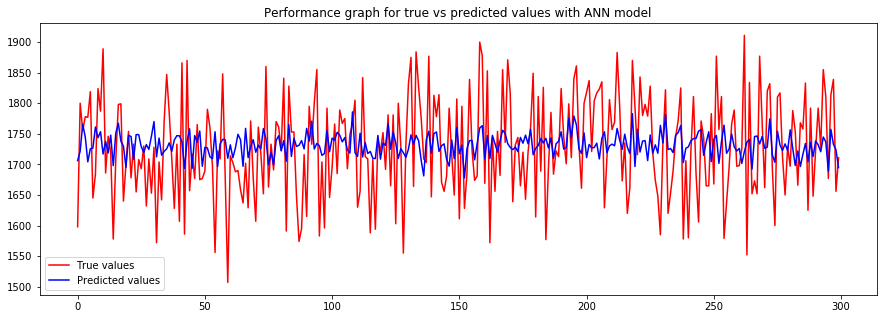

In [22]:
plt.figure(figsize=(15,5))
plt.plot(y_test,color='red')
plt.plot(yPredANN,color='blue')
plt.title('Performance graph for true vs predicted values with ANN model')
plt.legend(('True values', 'Predicted values'))
plt.show()

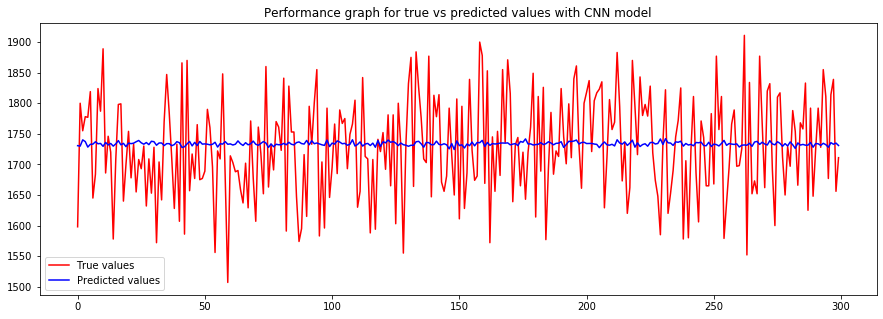

In [23]:
plt.figure(figsize=(15,5))
plt.plot(y_test,color='red')
plt.plot(yPredCNN,color='blue')
plt.title('Performance graph for true vs predicted values with CNN model')
plt.legend(('True values', 'Predicted values'))
plt.show()

In [24]:
#Root mean square error value for CNN model
print("RMSE value for CNN model",rmseCNN)

RMSE value for CNN model 81.35347825578944


In [25]:
#Root mean square error value for ANN model
print("RMSE value for ANN model",rmseANN)

RMSE value for ANN model 78.25379205921973


Root mean squared error(RMSE) takes the sqaure root of the average of the square of the difference between the original values and the predicted values. 
So, From RMSE performance metrics values, we can see that **ANN has performed better than CNN model** for doctor and patient assignment time reduction at the hospital. 